In [ ]:
#-------------------------------------------------------------------------#
#  Time Series Decomposition Using Spring System Applied on Phase Spaces  #
#                                                                         #
# Copyright (c) 2016-2019 Felipe S. L. G. Duarte, Ricardo A. Rios,        #
# Eduardo R. Hruschka and Rodrigo F. de Mello, Sao Carlos/SP, Brazil.     #
# All Rights Reserved.                                                    #
#                                                                         #
# you can redistribute it and/or modify it under the terms of the GNU     #
# General Public License as published by the Free Software Foundation,    #
# either version 3 of the License, or (at your option) any later version. #
#                                                                         #
# Spring is distributed in the hope that it will be useful, but WITHOUT   #
# ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or   #
# FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License    #
# for more details.                                                       #
#                                                                         #
# Contributor(s):                                                         #
# * Felipe S. L. G. Duarte - felipe.duarte@itau-unibanco.com.br           #
#                            fgduarte@icmc.usp.br                         #
# * Ricardo A. Rios - ricardoar@ufba.br                                   #
# * Eduardo R. Hruschka - eduardo.hruschka@itau-unibanco.com.br           #
#                         edu@poli                                        #
# * Rodrigo F. de Mello - mello@icmc.usp.br                               #
#                                                                         #                
# You should have received a copy of the GNU General Public License along #
# with Spring. If not, see <http://www.gnu.org/licenses/>.                #
#                                                                         #
# based on the publication:                                               #
#                                                                         #
#  @Article{spring2018,                                                   #
#   Title    = {Time Series Decomposition Using Spring System Applied on  #
#               Phase Spaces},                                            #
#   Author   = {Felipe S. L. G. Duarte, Ricardo A. Rios, Eduardo R.       #
#               Hruschka and Rodrigo F. de Mello},                        #
#   Journal  = {},                                                        # 
#   Year     = {2018},                                                    #
#   Month    = {10},                                                      #
#   Number   = {},                                                        #
#   Pages    = {},                                                        #
#   Volume   = {},                                                        # 
#   ISSN     = {},                                                        #  
#   Doi      = {},                                                        #  
# }                                                                       #
#                                                                         #
# The software is provided "As is", without warranty of any kind, express #
# or implied, including but not limited to the warranties of              #
# merchantability, fitness for a particular purpose and noninfringement.  #
# In no event shall the authors or copyright holders be liable for any    #
# claim, damages or other liability, whether in an action of contract,    #
# tort or otherwise, arising from, out of or in connection with the       #
# software or the use or other dealings in the software.                  #
#-------------------------------------------------------------------------#

In [2]:
require(plot3D)
require(tseriesChaos)
require(fNonlinear)
require(TSDecomposition);
require(ggplot2)

In [3]:
mainFolder     = '.'
dataFolder     = sprintf('%s/data', mainFolder)
resultFolder   = sprintf('%s/pipeline', mainFolder)
testResult     = sprintf('%s/testResult', mainFolder)

limits    = c('FT','WT', 'SSA', 'EMD-RP', 'Lazy', 'Spring')
tech      = c('fourier','wavelet','ssa','emdrp','lazy','spring')
det       = c('Sine', 'Lorenz','Rossler','Logistic', 'Henon')
sto       = c('zero','uni_0.01','uni_0.05','uni_0.10','uni_0.15','uni_0.20','norm_0.01','norm_0.05','norm_0.10','norm_0.15','norm_0.20')
metric    = c('mddl', 'mda', 'dfo')

In [4]:
plot_time_series <- function(ts, file = "", width=10, height=5, xlim=NULL, ylim=NULL){
    options(repr.plot.width=width, repr.plot.height=height)
    plot(ts, type="l", axes = FALSE, xlab="", ylab="", main='', xlim=xlim, ylim=ylim);
    #axis(1, cex.axis=1.5)
    axis(2, cex.axis=1.5)
    box()
    if(file != ""){
        dev.copy2pdf(file = file, width=width, height=height)
        system(sprintf("pdfcrop %s %s", file, file))
    }
}

In [5]:
plot_phase_space <- function(att, file = "", width=5, height=5, xlim=NULL, ylim=NULL){
    options(repr.plot.width=width, repr.plot.height=height)
    plot(att, axes = FALSE, xlab="", ylab="", main='', asp=1, xlim=xlim, ylim=ylim)
    box()
    if(file != ""){
        dev.copy2pdf(file = file, width=width, height=height)
        system(sprintf("pdfcrop %s %s", file, file))
    }
}

<hr>
<h1> Figure 1
<hr>

In [6]:
set.seed(42)
sto = rnorm(1000, mean = 0, sd = 0.12);
det = fNonlinear::lorentzSim(doplot = FALSE, times = seq(0, 50, by = (50/1000)), parms = c(sigma = 16, r = 45.92, b = 4), start = c(-14, -13, 47))[,2][1:1000];
det = det/max(abs(det))
series = det + sto;

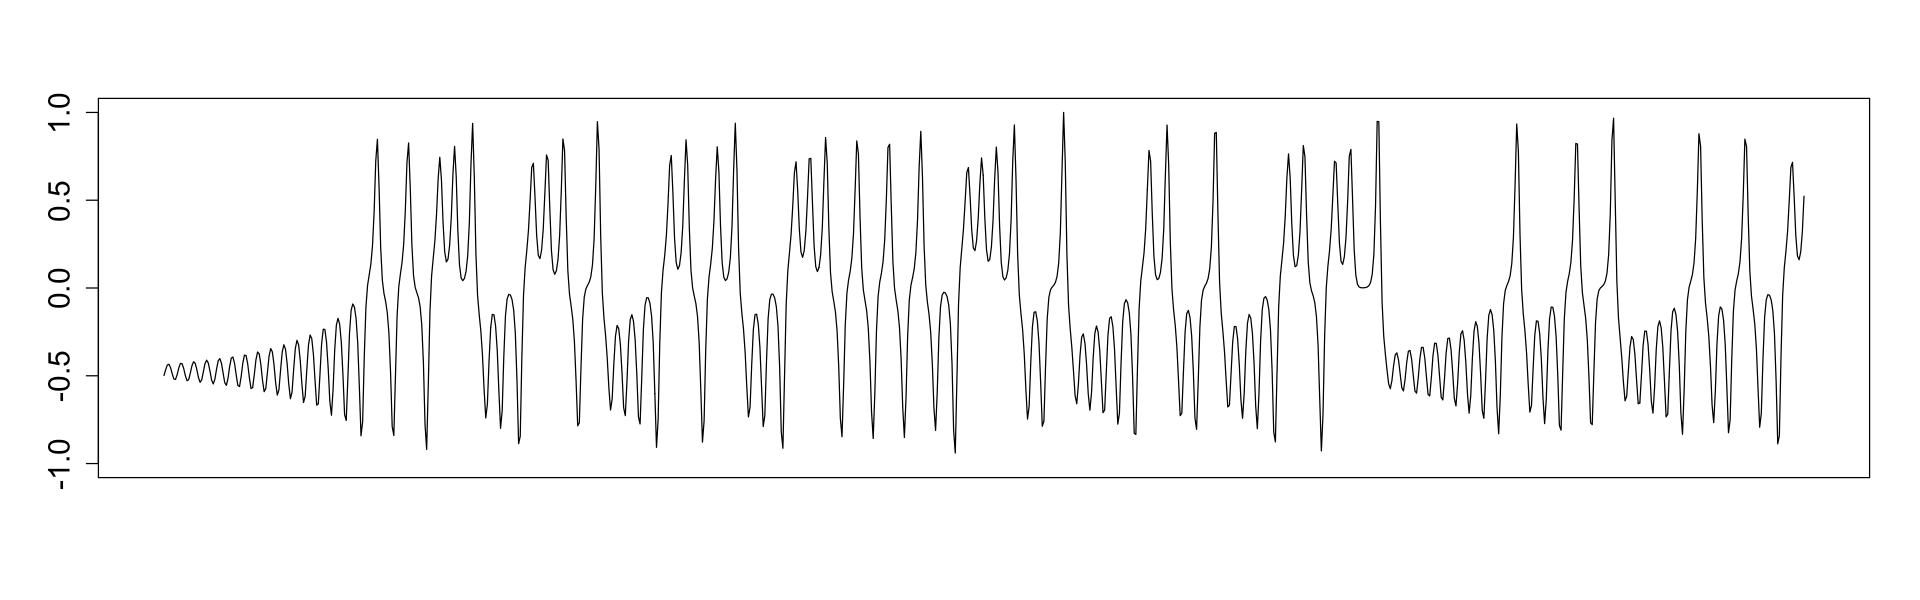

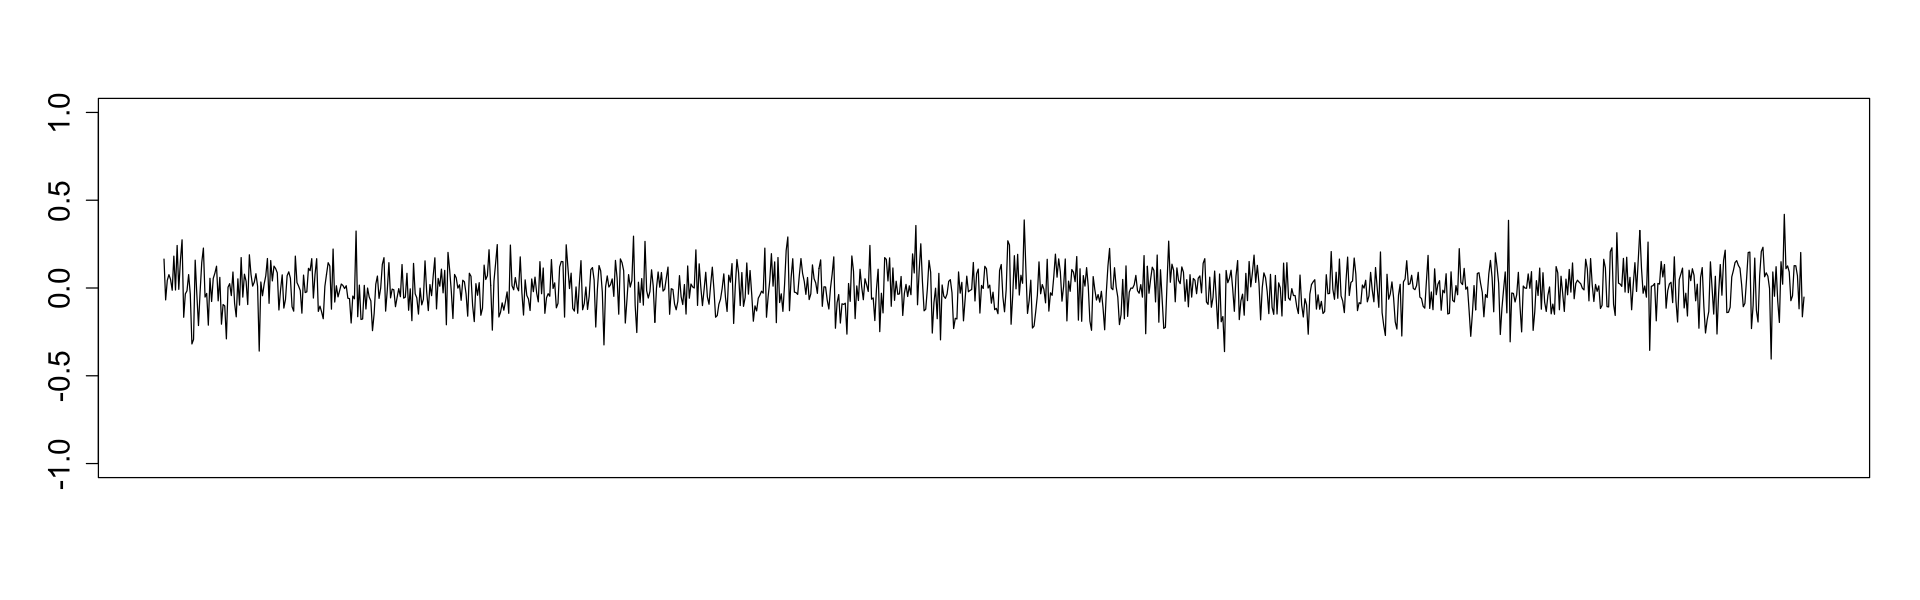

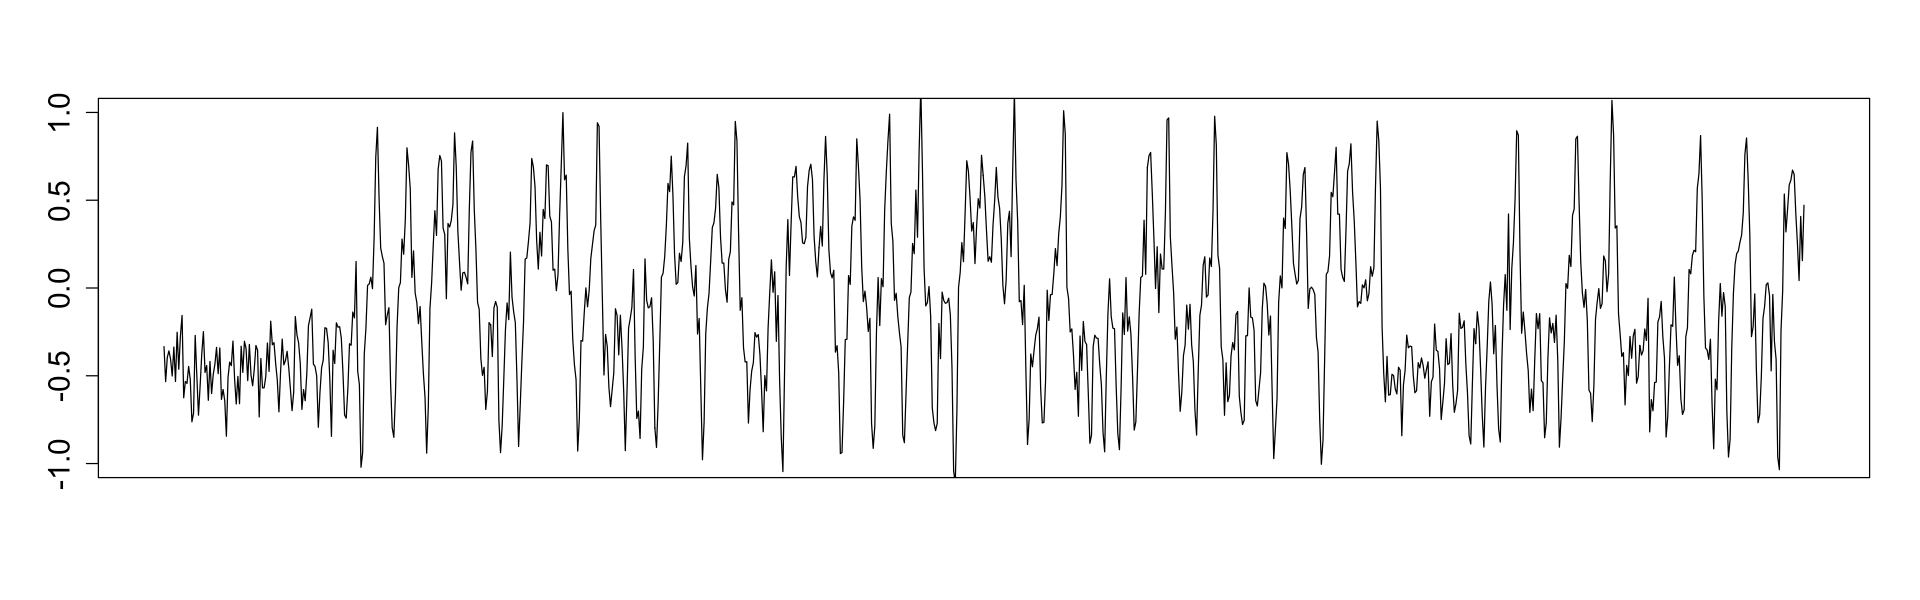

In [7]:
plot_time_series(det, "images/lorentz_ts.pdf", 16, 5, ylim=c(-1,1))
plot_time_series(sto, "images/rnorm_ts.pdf", 16, 5, ylim=c(-1,1))
plot_time_series(series, "images/det_sto_ts.pdf", 16, 5, ylim=c(-1,1))

<hr>
<h1> Figure 2
<hr>

In [8]:
set.seed(42)
det = fNonlinear::lorentzSim(doplot = FALSE, times = seq(0, 50, by = (50/3000)), parms = c(sigma = 16, r = 45.92, b = 4), start = c(-14, -13, 47))[1:3000,2:4]
det = det/max(abs(det))
att_det = tseriesChaos::embedd(det[,1], m=3, d=2)
att_rui = tseriesChaos::embedd(det[,1]+rnorm(3000, sd=0.03), m=3, d=2)

pdf 
  2

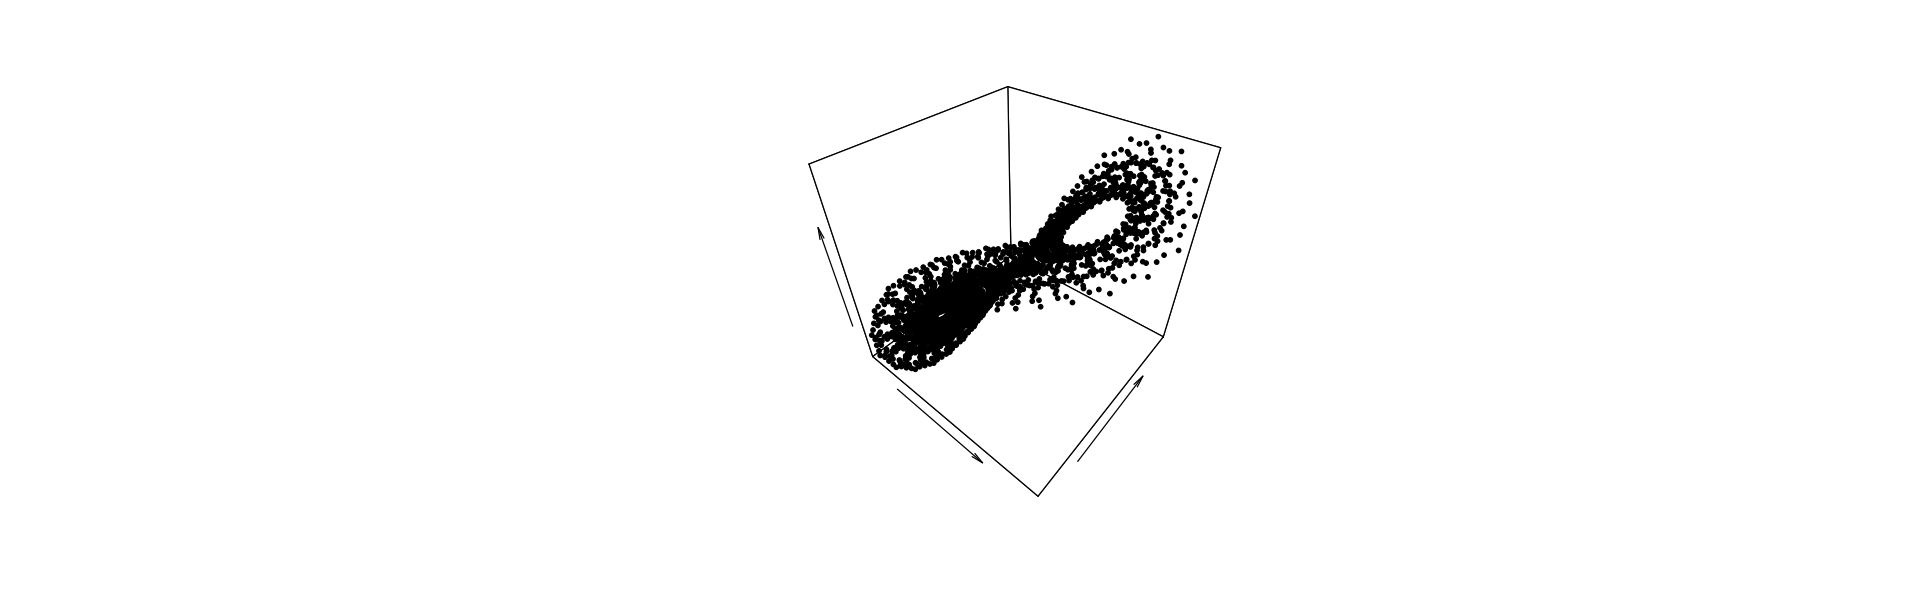

pdf 
  2

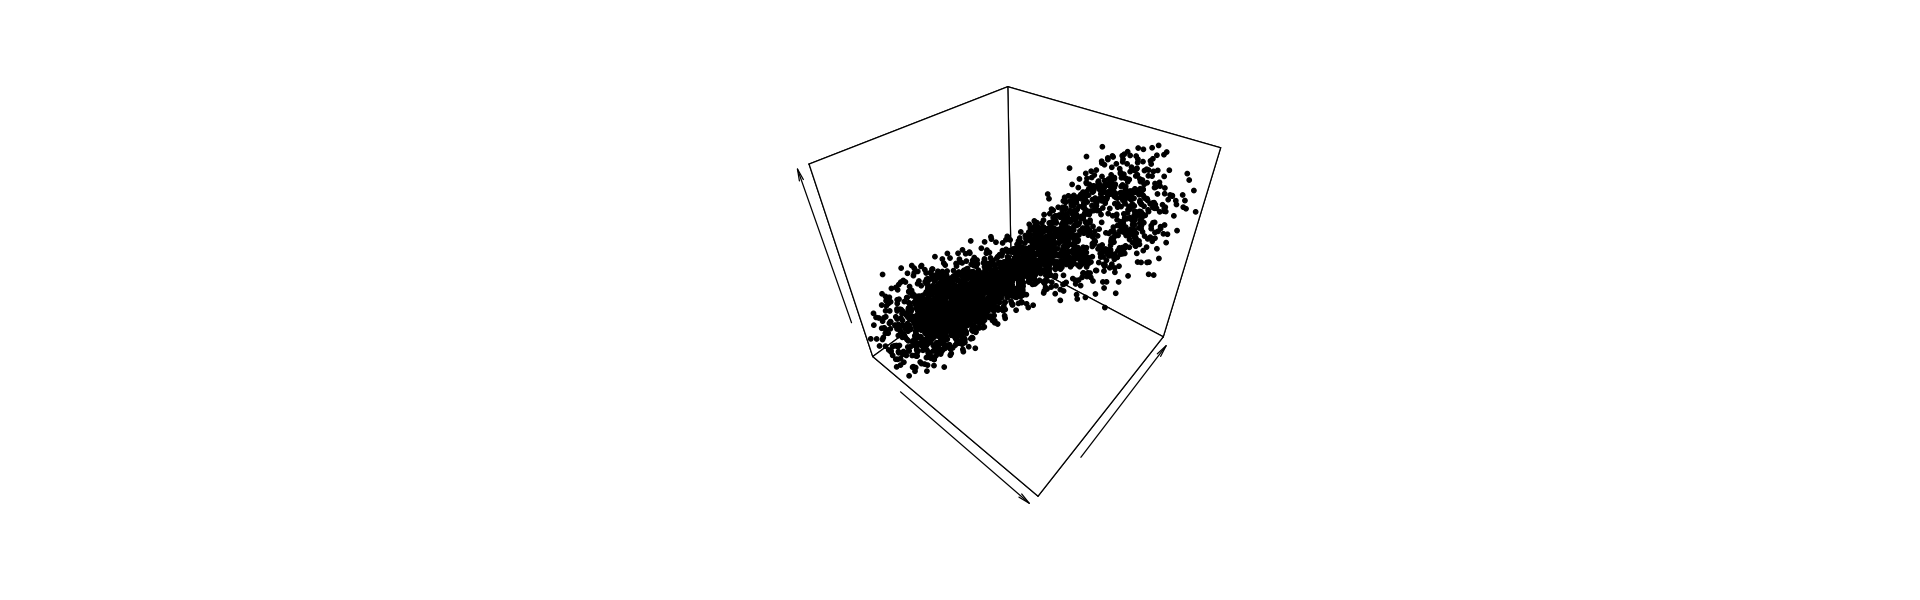

In [9]:
scatter3D(x = att_det[,1], y = att_det[,2], z=att_det[,3], xlab = '', ylab = '', zlab = '', pch = 19, cex = 0.5, col=1, asp=1)
file = "images/scatter3D_det.pdf"
dev.copy2pdf(file = file, width=6, height=6)
system(sprintf("pdfcrop %s %s", file, file))

scatter3D(x = att_rui[,1], y = att_rui[,2], z=att_rui[,3], xlab = '', ylab = '', zlab = '', pch = 19, cex = 0.5, col=1, asp=1)
file = "images/scatter3D_rui.pdf"
dev.copy2pdf(file = file, width=6, height=6)
system(sprintf("pdfcrop %s %s", file, file))

<hr>
<h1>Figure 3
<hr>

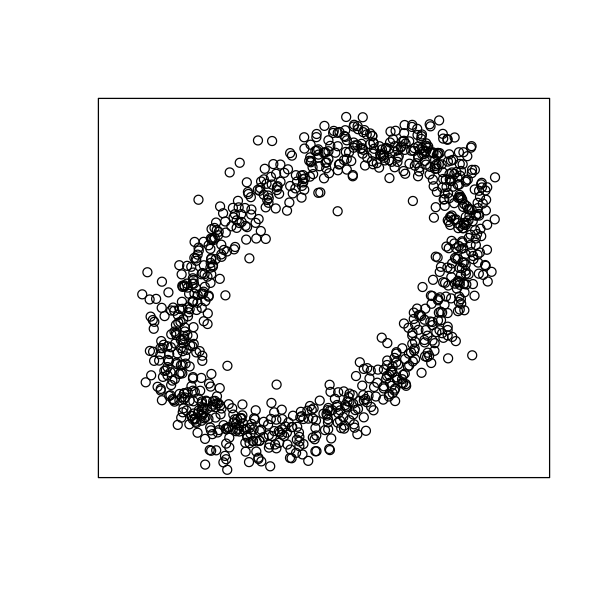

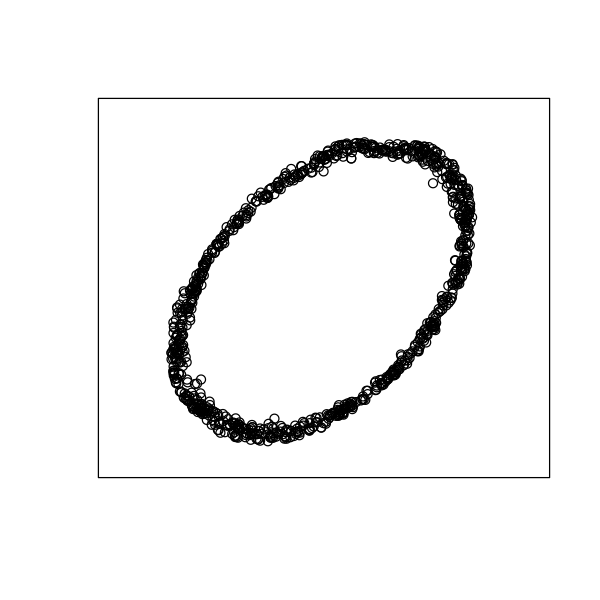

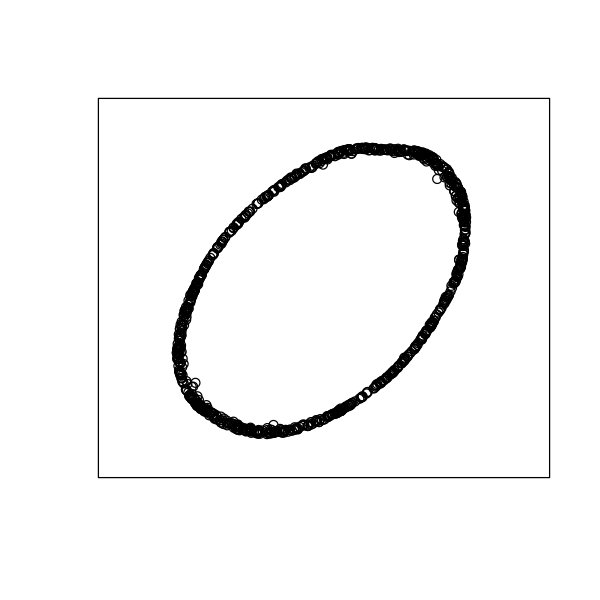

In [10]:
frac   = 0.065
num.it = 2
m      = 2
d      = 20
set.seed(42)
s.emb    = tseriesChaos::embedd(sin(2*pi*seq(0,9,len=1000)) + rnorm(1000, mean = 0, sd = 0.1) , m=m, d=d)
dist.mat = as.matrix(dist(s.emb))
for(j in 1:num.it){
    plot_phase_space(s.emb, file=sprintf("images/spring_%d.pdf", j), xlim=c(-1.2,1.2), ylim=c(-1.2,1.2))
    s.emb  = t(mapply(function(i, y, s.emb, frac){
        r  = as.numeric(quantile(y[-i], probs = frac))
        nn = s.emb[which(y <= r),]
        dp = apply(nn, 2, sd)
        np = colMeans(nn)
    }, 1:nrow(s.emb), as.data.frame(dist.mat), MoreArgs=list(frac=frac, s.emb=s.emb)))
}
plot_phase_space(s.emb, file=sprintf("images/spring_%d.pdf", j+1), xlim=c(-1.2,1.2), ylim=c(-1.2,1.2))

<hr>
<h1> Figure 4
<hr>

pdf 
  2

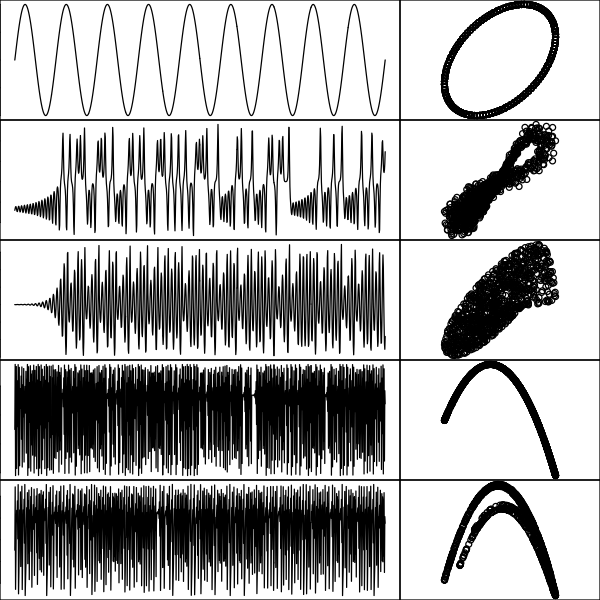

In [11]:
layout(matrix(c(1,1,2,
                3,3,4,
                5,5,6,
                7,7,8,
                9,9,10), nrow=5, byrow = T))
par(mar=c(0,0,0,0))

det = sin(2*pi*seq(0,9,len=1000))
plot_time_series(det, width=10, height=5)
plot_phase_space(tseriesChaos::embedd(det, 3, 20), width=5, height=5)

det = fNonlinear::lorentzSim(doplot = FALSE, times  = seq(0, 50, by = (50/1000)), parms  = c(sigma = 16, r = 45.92, b = 4), start  = c(-14, -13, 47))[1:1000,2]
plot_time_series(det,  width=10, height=5)
plot_phase_space(tseriesChaos::embedd(det, 3, 1),  width=5, height=5)

det = tseriesChaos::sim.cont(rossler.syst, start=0, end=650, dt=650/1000, start.x=c(0,0,0), parms=c(0.15, 0.2, 10))[1:1000]
plot_time_series(det, width=10, height=5)
plot_phase_space(tseriesChaos::embedd(det, 3, 1),  width=5, height=5)

det = logistic(iter=1000, x=0.5, r=3.8)
plot_time_series(det,width=10, height=5)
plot_phase_space(tseriesChaos::embedd(det, 3, 1),  width=5, height=5)

det = nonlinearTseries::henon(start=c(-0.006423277,-0.473545134), n.sample = 1000, n.transient=10, do.plot=FALSE)$x[1:1000]
plot_time_series(det, width=10, height=5)
plot_phase_space(tseriesChaos::embedd(det, 3, 1), width=5, height=5)

par(mfrow=c(1,1))
file = "images/fig5.pdf"
dev.copy2pdf(file = file, width=19, height=24)
system(sprintf("pdfcrop %s %s", file, file))

<hr>
<h1>Figure 5
<hr>

pdf 
  2

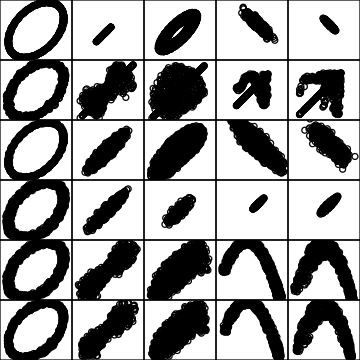

In [13]:
options(repr.plot.width=3, repr.plot.height=3)
i0 = 4
layout(matrix(1:(5*length(tech)), ncol=5, nrow=length(tech), byrow = T))
par(mar=c(0,0,0,0))
tech_file = c('fourier','wavelet','ssa','emdrp','lazy','lazypp')
for(j in 1:length(tech)){
    for(i in 1:5){
        t = tech[j]
        result = get(load(sprintf("%s/%s_%04d.RData",resultFolder, t, (i0+((i-1)*11)))))
        result_csv = read.csv(sprintf("%s/%s.csv",testResult,tech[j]))
        idx = result_csv$idx[(i0+((i-1)*11))]
        if(j == 5) idx = 1
        att = tseriesChaos::embedd(result$gs[[idx]]$det, result$series_obj$det.embDim, result$series_obj$det.sepDim)   
        plot(att, axes = FALSE, xlab="", ylab="", main='', asp=1, xlim=c(-1,1), ylim=c(-1,1))
        box()
    }
}
par(mfrow=c(1,1))
file = "images/matrix.pdf"
dev.copy2pdf(file = file, width=19, height=24)
system(sprintf("pdfcrop %s %s", file, file))

<hr>
<h1>Tables
<hr>

In [16]:
result_data = list()
for(t in tech){
    file = sprintf("%s/%s.csv",testResult,t)
    cat('Reading',file,'\n')
    result_data[[t]] = read.csv(file)
}

Reading ./testResult/fourier.csv 
Reading ./testResult/wavelet.csv 
Reading ./testResult/ssa.csv 
Reading ./testResult/emdrp.csv 
Reading ./testResult/lazy.csv 
Reading ./testResult/spring.csv 


In [17]:
for(d in result_data) cat(nrow(d), '\n')

1650 
1650 
1650 
1650 
1650 
1650 


In [ ]:
result_array = array(dim=c(length(tech),length(det),length(metric),length(sto),30), dimnames = list(tech, det, metric, sto, 1:30))
for(t in 1:length(tech)){
    for(d in 1:length(det)){
        for(m in 1:length(metric)){
            for(s in 1:length(sto)){
                for(b in 1:30){
                    result_array[t,d,metric[m],s,b] = unlist(result_data[[t]][metric[m]])[((b-1)*length(det)*length(sto)) + ((d-1)*length(sto)) + s]
                }
            }
        }
    }
}

In [ ]:
for(m in metric){
    cat(sprintf('%s\n', m))
    for(t in 1:length(tech)){
        for(d in 1:length(det)){
            cat(sprintf('$%.2f\\pm%.2f$& ',mean(result_array[t,d,m,,]), sd(result_array[t,d,m,,])))
        }
        cat(sprintf('$%.2f\\pm%.2f$\\\\\n', mean(result_array[t,,m,,]), sd(result_array[t,,m,,])))
    }
    cat(sprintf('\n\n'))
}

<hr>
<h1>Figure 6
<hr>

In [ ]:
tech_name_map <- function(t){
    switch(t, 
        fourier={ return('FT') },
        wavelet={ return('WT') },
        ssa={ return('SSA') },  
        emdrp={ return('EMD-RP') },
        lazy={ return('Lazy') },   
        spring={ return('Spring') },
        { return('unknown')}
    )
}

data = data.frame()
for(t in tech){
    data = rbind(data, data.frame(tech_name_map(t),
                             as.vector(result_array[t,,'mddl',,]),
                             as.vector(result_array[t,,'mda',,])
                            )
                )
}
data = cbind(1:nrow(data), data)
colnames(data) = c('testId','tech','mddl', 'mda')

In [ ]:
limits = tech#c('FT','WT', 'SSA', 'EMD-RP', 'Spring')
options(repr.plot.width=16, repr.plot.height=8)
p = ggplot(data, aes(x=tech, y=mddl, color = tech)) +
    geom_violin() +
    #scale_y_continuous(limits = c(0, 30)) +
    labs(y = "Mean Distance from the Diagonal Line (MDDL)", x = "") +
    #scale_x_discrete(limits=limits) +
    theme(text = element_text(size=15), legend.position="none")
plot(p) 
file = "images/violin_mddl.pdf"
dev.copy2pdf(file = file, width=10, height=5)
system(sprintf("./crop.sh %s", file))

In [ ]:
p = ggplot(data, aes(x=tech, y=mda, color = tech)) +
    geom_violin()+
    #scale_y_continuous(limits = c(0, 30)) +
    labs(y = "Mean Distance from Attractors (MDA)", x = "") +
    #scale_x_discrete(limits=limits) +
    theme(text = element_text(size=15), legend.position="none")
plot(p) 
file = "images/violin_mda.pdf"
dev.copy2pdf(file = file, width=10, height=5)
system(sprintf("./crop.sh %s", file))

In [ ]:
latexCode = TRUE
outperform_percentage = matrix(nrow=length(tech),ncol=length(tech))
colnames(outperform_percentage) = rownames(outperform_percentage) = tech
for(t_a in tech){
    for(t_b in tech){
        result_str = sprintf('%.2f/%.2f',        
            (length(which(result_array[t_a,,1,,] <= result_array[t_b,,1,,]))/(30*11*5)),
            (length(which(result_array[t_a,,2,,] <= result_array[t_b,,2,,]))/(30*11*5)))
        outperform_percentage[t_a,t_b] = result_str
        if(latexCode) cat(sprintf('&%s ',outperform_percentage[t_a,t_b]))
    }
    if(latexCode) cat('\\\\\n')
}
outperform_percentage